In [26]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd


In [27]:
train_data = pd.read_csv('emnist-byclass-train.csv', header=None)
test_data = pd.read_csv('emnist-byclass-test.csv', header=None)

In [3]:
print("Training Data:")
print(train_data.head())


Training Data:
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   35    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
1   36    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
2    6    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
3    3    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
4   22    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]


In [4]:
# Display the first few rows of the testing data
print("\nTesting Data:")
print(test_data.head())


Testing Data:
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   18    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
1   36    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
2    0    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
3    3    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   
4   33    0    0    0    0    0    0    0    0    0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]


In [29]:
# The last column contains the labels; all other columns are pixel values
X_train = train_data.iloc[:, 1:].values  # All rows, all columns except the first
y_train = train_data.iloc[:, 0].values    # All rows, only the first column

X_test = test_data.iloc[:, 1:].values      # Same for test data
y_test = test_data.iloc[:, 0].values        # Labels for test data

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [30]:
 # Reshape the data to 28x28 images
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Display the shape of the data
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (73674, 28, 28), Labels shape: (73674,)
Testing data shape: (74219, 28, 28), Labels shape: (74219,)


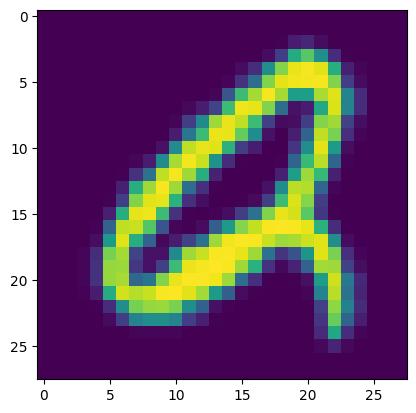

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [8]:
print(y_train[1])

36


In [31]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(62, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 574,142 (2.19 MB)

 Trainable params: 574,142 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=40, validation_split=0.15)

Epoch 1/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6213 - loss: 1.4068 - val_accuracy: 0.7601 - val_loss: nan
Epoch 2/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7930 - loss: 0.6319 - val_accuracy: 0.7922 - val_loss: nan
Epoch 3/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8158 - loss: 0.5282 - val_accuracy: 0.7975 - val_loss: nan
Epoch 4/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.8319 - loss: 0.4700 - val_accuracy: 0.8046 - val_loss: nan
Epoch 5/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8422 - loss: 0.4333 - val_accuracy: 0.8063 - val_loss: nan
Epoch 6/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.8515 - loss: 0.3963 - val_accuracy: 0.8054 - val_loss: nan
Epoch 7/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8608 - loss: 0.3664 - val_accuracy: 0.8068 - val_loss: nan
Epoch 8/40
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8657 - loss: 0.3487 - val_a

In [38]:
y_prob = model.predict(X_test)

2320/2320 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [39]:
y_pred = y_prob.argmax(axis=1)

In [40]:
y_pred

array([ 1, 30,  0, ..., 19,  2,  0])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.7970735256470715

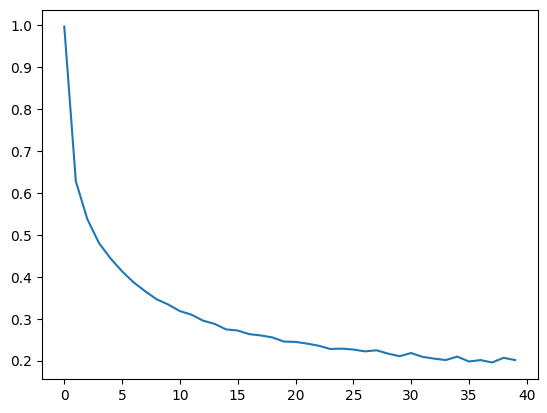

In [43]:
plt.plot(history.history['loss'])

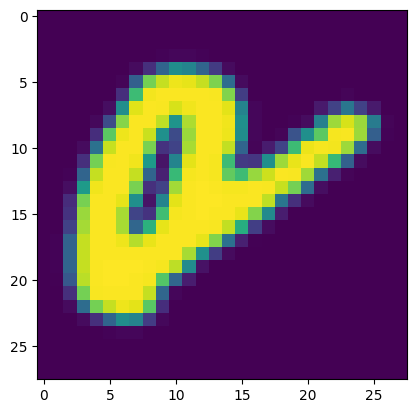

In [44]:
plt.imshow(X_test[299])

In [45]:
model.predict(X_test[299].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([9])

In [46]:
print(y_test[299])

9
